# Cleaning - missing and duplicate data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

#want to filter the seaborn warnings
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

## Generate a t-shirt order
have a name, a t-shirt size, a t-shirt color and a weight(in pounds)<br>
Uses the <a href="https://pypi.org/project/names/">names </a> module to generate random names

In [2]:
import utils as ut
df = ut.generate_tshirt_order()
df

,weight,t_shirt_size,t_shirt_color,name
0,97.723004,small,black,Jesse Long
1,129.410561,small,blue,Lynette Lewis
2,95.211784,small,black,Robert Collins
3,104.737409,small,red,Peter Holquin
4,113.805503,small,green,Darnell Mcculley
...,...,...,...,...
295,165.193537,large,orange,Wilma Clermont
296,181.266452,large,orange,Lisa Edwards
297,175.536332,large,blue,Gerardo Majera
298,148.978939,large,black,Chris Struebing


### Make some duplicates

In [3]:
# make some duplicates just to show how to handle duplicates (delete them)
#lets find the oldest male and female
def fun1(df,numb=5):
    #generates numb rows from df
    return (df.iloc[0:numb,:])


#generates numb rows from each group to be used as duplicates
df_dups=df.groupby('t_shirt_size').apply(fun1)
df_dups

weight t_shirt_size t_shirt_color              name
t_shirt_size                                                             
large        200  206.736476        large         black      Rita Cawthon
             201  186.240147        large         black       Robin Boles
             202  156.087355        large           red         Lula Lynn
             203  166.836044        large           red     Helen Soloman
             204  140.055761        large         black    Philip Edwards
medium       100  146.250786       medium         black    Jeana Kinstler
             101  119.992648       medium          blue    Violet Padmore
             102  146.653632       medium           red      Bella Omersa
             103  161.236969       medium          blue    Dottie Bringle
             104  140.373174       medium           red       Alma Calder
small        0     97.723004        small         black        Jesse Long
             1    129.410561        small          blue     Lynette Lewis
             2     95.211784        small         black    Robert Collins
             3    104.737409        small           red     Peter Holquin
             4    113.805503        small         green  Darnell Mcculley

### Append to original dataframe

In [4]:
df=pd.concat([df,df_dups],ignore_index=True)
#the old, soon to be deprecated way
# df=df.append(df_dups, ignore_index=True)
len(df)

315

In [5]:
df.duplicated().sum()

15

In [6]:
df[df.duplicated()].sort_values('name')

,weight,t_shirt_size,t_shirt_color,name
309,140.373174,medium,red,Alma Calder
307,146.653632,medium,red,Bella Omersa
314,113.805503,small,green,Darnell Mcculley
308,161.236969,medium,blue,Dottie Bringle
303,166.836044,large,red,Helen Soloman
305,146.250786,medium,black,Jeana Kinstler
310,97.723004,small,black,Jesse Long
302,156.087355,large,red,Lula Lynn
311,129.410561,small,blue,Lynette Lewis
313,104.737409,small,red,Peter Holquin


### randomly select 20% of rows for t_shirt_size ommision

In [7]:
import random
res = random.sample(range(0, len(df)), int(0.2 * len(df)))
print(f'Number of rows to have "t_shirt_size" set to np.Nan is {len(res)}' )

Number of rows to have "t_shirt_size" set to np.Nan is 63


In [8]:
#first, save orig size
df['t_shirt_size_orig'] = df['t_shirt_size']  #all rows
# df['t_shirt_size_orig'] = df.loc[res,'t_shirt_size'] #just the rows to be set to np.NaN

#then lose orig size
df.loc[res,'t_shirt_size']=np.NaN
df

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,97.723004,small,black,Jesse Long,small
1,129.410561,small,blue,Lynette Lewis,small
2,95.211784,NaN,black,Robert Collins,small
3,104.737409,small,red,Peter Holquin,small
4,113.805503,small,green,Darnell Mcculley,small
...,...,...,...,...,...
310,97.723004,small,black,Jesse Long,small
311,129.410561,small,blue,Lynette Lewis,small
312,95.211784,NaN,black,Robert Collins,small
313,104.737409,small,red,Peter Holquin,small


In [9]:
#how many total
#df.isna().sum().sum()

#how many are null?
df.t_shirt_size.isna().sum()

63

In [10]:
#show the missing data
df[df.t_shirt_size.isna()].head()

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
2,95.211784,NaN,black,Robert Collins,small
7,76.654326,NaN,red,Grace Wallin,small
9,97.647900,NaN,green,Brian Spraggins,small
14,68.516420,NaN,orange,Sheena Stevens,small
17,71.432310,NaN,blue,Robert Hastings,small


### Lets take a look at the distribution

#### kind ='hist', hist will bin the number of weights and display them, hue will determine which color group they belong to

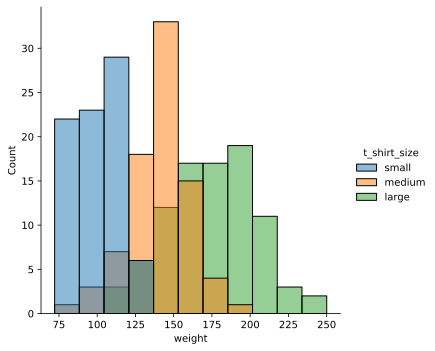

In [11]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='hist', fill=True);

#### kind ='kde', kde is a kernel density estimater, essentially calculates a gaussian distribution around each point, and then adds these distributions, and then divides by the number of points to get the smooth curves you see that have an area of 1.  I'm showing it because its easier to see the distributions

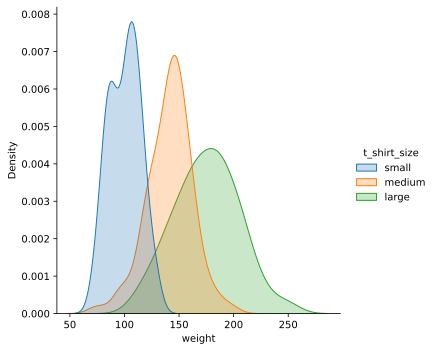

In [12]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='kde', fill=True);

### Find them first

In [13]:
df.duplicated(keep=False).sum()

26

### Visually Verify 

In [14]:
df[df.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
104,140.373174,medium,red,Alma Calder,medium
309,140.373174,medium,red,Alma Calder,medium
102,146.653632,medium,red,Bella Omersa,medium
307,146.653632,medium,red,Bella Omersa,medium
103,161.236969,medium,blue,Dottie Bringle,medium
308,161.236969,medium,blue,Dottie Bringle,medium
203,166.836044,large,red,Helen Soloman,large
303,166.836044,large,red,Helen Soloman,large
100,146.250786,medium,black,Jeana Kinstler,medium
305,146.250786,medium,black,Jeana Kinstler,medium


### Now drop the regular duplicates that are not missing data

In [15]:
df.duplicated??


Signature:
df.duplicated(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    keep: 'DropKeep' = 'first',
) -> 'Series'
Source:   
    def duplicated(
        self,
        subset: Hashable | Sequence[Hashable] | None = None,
        keep: DropKeep = "first",
    ) -> Series:
        """
        Return boolean Series denoting duplicate rows.

        Considering certain columns is optional.

        Parameters
        ----------
        subset : column label or sequence of labels, optional
            Only consider certain columns for identifying duplicates, by
            default use all of the columns.
        keep : {'first', 'last', False}, default 'first'
            Determines which duplicates (if any) to mark.

            - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
            - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
            - False : Mark all duplicates as ``True``.

        Returns
        -------
 

In [16]:
df.drop( df[df.duplicated(keep='first')].index, inplace=True)

In [17]:
len(df)

302

## What if one of the duplicated rows is missing the t-shirt size?  Then duplicated() will not find it.  Maybe we should check for duplicates in the 'name' column instead

start here 1/29/25

In [18]:
df.name.duplicated(keep=False).sum()

4

### Verify that they are duplicates first

In [22]:
df[df.name.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig


### We want to delete the one that has a np.nan for t_shirt_size.

In [20]:
# to see the indexis that will be dropped
df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index

Index([101, 314], dtype='int64')

In [21]:
df.drop( df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index, inplace=True)

## Duplicates are gone, now how to impute the missing fields

In [24]:
len(df[(df['t_shirt_size'].isnull())])

60

In [25]:
# how many match
def printstats(df):
    numbmatches=(df['t_shirt_size_orig']==df['t_shirt_size']).sum()
    print(f'{numbmatches} tshirt sizes are correct out of {len(df)} total')

### One way is to use SimpleImputer and assign the median value to all the missing values


In [26]:
df_med=df.copy()
df_med

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,97.723004,small,black,Jesse Long,small
1,129.410561,small,blue,Lynette Lewis,small
2,95.211784,NaN,black,Robert Collins,small
3,104.737409,small,red,Peter Holquin,small
4,113.805503,small,green,Darnell Mcculley,small
...,...,...,...,...,...
296,181.266452,large,orange,Lisa Edwards,large
297,175.536332,large,blue,Gerardo Majera,large
298,148.978939,large,black,Chris Struebing,large
299,136.549466,NaN,orange,Christopher Schoppert,large


In [309]:
# df[df.t_shirt_size.isnull()]

In [27]:
df.t_shirt_size.value_counts(dropna=False)

t_shirt_size
large     85
medium    78
small     77
NaN       60
Name: count, dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)  #works with strings
imp = imp.fit(df_med[['t_shirt_size']])   #here is where it determines what the most frequent is
df_med['t_shirt_size']=imp.transform(df_med[['t_shirt_size']])[:,0] #here is where the transform is applied 
# imp.transform(df_med[['t_shirt_size']])[:,0]

In [31]:
printstats(df_med)

255 tshirt sizes are correct out of 300 total


### Another way is to find the mean weight for each t-shirt size, and then assign missing value t-shirt size based on weight
For each NaN, assign t-shirt size to closest mean

#### First calculate average weight for each t-shirt size

In [34]:
df_better = df.copy()

In [35]:
avgs = df_better.groupby('t_shirt_size').weight.mean()
avgs

t_shirt_size
large     175.545923
medium    141.169512
small      99.836801
Name: weight, dtype: float64

In [36]:
#how many in each group
df_better.groupby('t_shirt_size').count()

,weight,t_shirt_color,name,t_shirt_size_orig
t_shirt_size,,,,
large,85,85,85,85
medium,78,78,78,78
small,77,77,77,77


#### Impute the value, replace any NaNs, and add a 1 in a column to indicate that this value was imputed 
<mark>The indicater column will inform a ML algorithm that this value was imputed

In [37]:
#map works on a column apply works on a row, which means we have access tothe entire row
#can also return more than 1 value so that we can have an indicator value

def func(row):
    if row.t_shirt_size is np.NaN:
        #which avgs.weight is this weight closest to?
        
        #get a list of differences between this weight and average weights
        lst_vals = [abs(row.weight-val) for val in avgs]

        #get the index of the minimum value
        min_val = min(lst_vals)
        min_index=lst_vals.index(min_val)

        #return t_shirt_size corresponding to this index
        return pd.Series([avgs.index[min_index],True],index=['t_shirt_size','t_shirt_size_indicator'])
    #its not missing, return what's there
    return pd.Series([row.t_shirt_size,False],index=['t_shirt_size','t_shirt_size_indicator'])
# df_better['t_shirt_size_indicator']=False
df_better[['t_shirt_size','t_shirt_size_indicator']]=df_better.apply(func, axis=1)

In [39]:
df.head()

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
0,97.723004,small,black,Jesse Long,small
1,129.410561,small,blue,Lynette Lewis,small
2,95.211784,NaN,black,Robert Collins,small
3,104.737409,small,red,Peter Holquin,small
4,113.805503,small,green,Darnell Mcculley,small


In [38]:
printstats(df_better)

285 tshirt sizes are correct out of 300 total


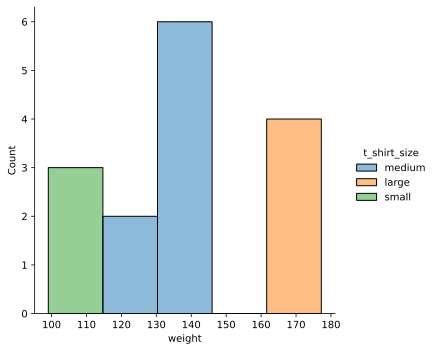

In [40]:
#see which ones it got wrong, look at the distributions in above plots
#it got them wrong because the weights were outliers
dfb=df_better[(df_better['t_shirt_size'] != df_better['t_shirt_size_orig'])]

sns.displot(data=dfb, x="weight",  hue="t_shirt_size", kind='hist', fill=True);

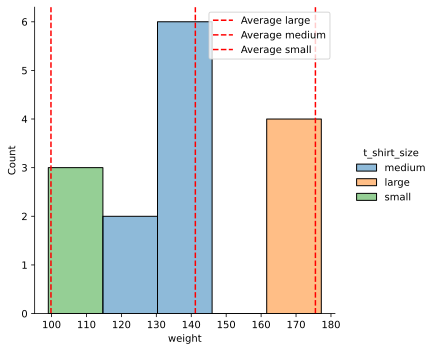

In [41]:
# Plot the distribution
sns.displot(data=dfb, x="weight", hue="t_shirt_size", kind='hist', fill=True)

# Add vertical lines for the average weights
for size, avg_weight in avgs.items():
    plt.axvline(avg_weight, linestyle='--', label=f'Average {size}', color='red')

# Add legend
plt.legend();

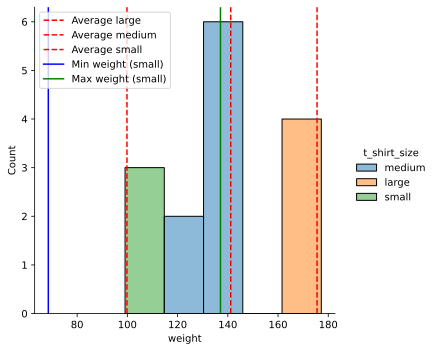

In [42]:
# Plot the distribution
sns.displot(data=dfb, x="weight", hue="t_shirt_size", kind='hist', fill=True)

# Add vertical lines for the average weights
for size, avg_weight in avgs.items():
    plt.axvline(avg_weight, linestyle='--', label=f'Average {size}', color='red')

# Add vertical lines for the range of weights for 'small' t-shirt size using t_shirt_size_orig
small_weights = df[df['t_shirt_size_orig'] == 'small']['weight']
plt.axvline(small_weights.min(), linestyle='-', color='blue', label='Min weight (small)')
plt.axvline(small_weights.max(), linestyle='-', color='green', label='Max weight (small)')

# Add legend
plt.legend();

In [ ]:
# Plot the distribution of weights for the "small" t-shirt size
sns.histplot(data=df[df['t_shirt_size_orig'] == 'small'], x='weight', color='blue', label='Original Small', kde=True)

# Plot the weights of the incorrectly imputed t-shirt sizes
sns.histplot(data=dfb[dfb['t_shirt_size'] == 'small'], x='weight', color='red', label='Imputed Small', kde=True)

# Add vertical lines for the average weights
for size, avg_weight in avgs.items():
    plt.axvline(avg_weight, linestyle='--', label=f'Average {size}', color='green')

# Add legend
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weights for Small T-Shirt Size')
plt.show();

In [43]:
incorrect_imputations = dfb[dfb['t_shirt_size'] != dfb['t_shirt_size_orig']]
incorrect_imputations

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig,t_shirt_size_indicator
34,135.433530,medium,green,Debra Shields,small,True
51,137.077140,medium,green,Vernie Martin,small,True
57,124.570845,medium,black,Kim Mitchell,small,True
81,127.155204,medium,black,Angela Carnillo,small,True
110,169.959965,large,blue,Teodoro Beard,medium,True
119,101.458622,small,black,Gay Bales,medium,True
131,99.073483,small,orange,Jack Burnside,medium,True
144,112.102410,small,red,Tina Lempke,medium,True
170,177.233329,large,orange,Christine Breton,medium,True
173,162.413180,large,red,Michael Daniels,medium,True


# Generate Slide for the lecture

In [ ]:
def func(df, numb=5):
    return (df.iloc[0:numb,:])
    
df.groupby('t_shirt_size', dropna=False).apply(func,numb=3)